In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import bokeh as bk
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

from plotnine import *
import plotnine.options as pno

import altair as alt

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

In [24]:
dataset = pd.read_csv("data.csv")
dataset.head()


acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [25]:
import matplotlib.dates as mdates
from datetime import datetime
dataset['release_date'] = [datetime.strptime(d, "%Y-%m-%d") if len(d) > 9 else 'NaN' for d in dataset['release_date']]


In [39]:

sample = dataset[dataset['release_date']!='NaN']
sample.head()

acousticness                                            artists  \
3          0.995                               ['Francisco Canaro']   
8          0.995                     ['Francisco Canaro', 'Charlo']   
14         0.977  ['Ludwig van Beethoven', 'Staatskapelle Berlin...   
17         0.994                ['Francisco Canaro', 'Luis Scalon']   
19         0.992                               ['Francisco Canaro']   

    danceability  duration_ms  energy  explicit                      id  \
3          0.781       180760   0.130         0  6M94FkXd15sOAOQYRnWPN8   
8          0.683       162493   0.207         0  6OaJ8Bh7lsBeYoBmwmo2nh   
14         0.335       276563   0.105         0  6Rwn56jcC0TdGQzbRl7NGw   
17         0.787       167107   0.156         0  6TFuAErGpJ9FpxQQ1HC8nM   
19         0.763       173707   0.132         0  6Ukl7n0q3Cjd0Og8uBmVeP   

    instrumentalness  key  liveness  loudness  mode  \
3             0.8870    1     0.111   -14.734     0   
8             0.2060    9     0.337    -9.801     0   
14            0.8400    5     0.231   -16.049     0   
17            0.6590    4     0.110   -14.056     0   
19            0.0693    4     0.112   -13.002     1   

                                                 name  popularity  \
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
8                    Moneda Corriente - Remasterizado           0   
14      Symphony No. 5 in C Minor, Op. 67: 3. Allegro           0   
17                Invocación al Tango - Remasterizado           0   
19  Tendrás Que Llorar Conmigo - Instrumental (Rem...           0   

           release_date  speechiness    tempo  valence  year  
3   1928-09-25 00:00:00       0.0926  108.003    0.720  1928  
8   1928-10-03 00:00:00       0.1270  119.833    0.493  1928  
14  1928-01-01 00:00:00       0.0716   80.204    0.406  1928  
17  1928-09-16 00:00:00       0.1570  117.167    0.849  1928  
19  1928-09-17 00:00:00       0.0886  111.679    0.832  1928

In [40]:
grouped_sample = sample.groupby('release_date', as_index=False).agg({"acousticness": "mean",
 "danceability": [min, max, 'mean', 'std'],
  "duration_ms": [min, max, 'mean', 'std'],
   "energy": [min, max, 'mean', 'std'],
    "explicit": [min, max, 'mean', 'std'],
    "instrumentalness": [min, max, 'mean', 'std'],
    "loudness": [min, max, 'mean', 'std'],
    "popularity": [min, max, 'mean', 'std'],
    "tempo": [min, max, 'mean', 'std'],
    "valence": [min, max, 'mean', 'std']})

grouped_sample.columns = [' '.join(col).strip() for col in grouped_sample.columns.values]

grouped_sample.head()

release_date  acousticness mean  danceability min  danceability max  \
0   1921-02-20           0.992500             0.380             0.398   
1   1921-03-20           0.989571             0.286             0.655   
2   1921-03-27           0.017500             0.527             0.527   
3   1921-04-12           0.994000             0.362             0.362   
4   1921-09-11           0.248150             0.341             0.713   

   danceability mean  danceability std  duration_ms min  duration_ms max  \
0           0.389000          0.012728           192601           211851   
1           0.433524          0.114270           130200           198200   
2           0.527000               NaN           205072           205072   
3           0.362000               NaN           182335           182335   
4           0.591333          0.135376           133669           404062   

   duration_ms mean  duration_ms std  ...  popularity mean  popularity std  \
0     202226.000000     13611.805538  ...              0.0             0.0   
1     165193.047619     16596.108928  ...              0.0             0.0   
2     205072.000000              NaN  ...              0.0             NaN   
3     182335.000000              NaN  ...              0.0             NaN   
4     261664.333333     95336.230711  ...              0.0             0.0   

   tempo min  tempo max  tempo mean  tempo std  valence min  valence max  \
0     71.599    136.156  103.877500  45.648692       0.3780        0.817   
1     63.241    167.352   90.545095  28.610382       0.4030        0.730   
2    159.935    159.935  159.935000        NaN       0.4930        0.493   
3     91.551     91.551   91.551000        NaN       0.2860        0.286   
4     79.934    121.051  100.171333  22.098592       0.0778        0.544   

   valence mean  valence std  
0       0.59750     0.310420  
1       0.55581     0.100682  
2       0.49300          NaN  
3       0.28600          NaN  
4       0.26145     0.186130  

[5 rows x 38 columns]

## Time Series Line Test

Time series, 3 numeric variables.

### Matplotlib

Text(0, 0.5, 'Danceability')

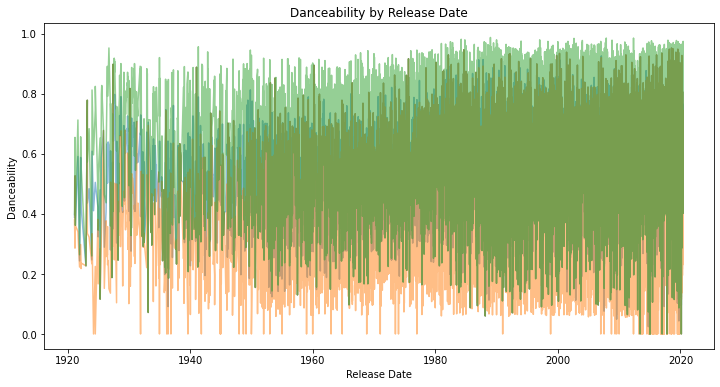

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(title = "Danceability by Release Date")
b1 = ax.plot(grouped_sample['release_date'], grouped_sample['danceability mean'], alpha = .5)
b2 = ax.plot(grouped_sample['release_date'], grouped_sample['danceability min'], alpha = .5)
b3 = ax.plot(grouped_sample['release_date'], grouped_sample['danceability max'], alpha = .5)

ax.set_xlabel("Release Date")
ax.set_ylabel("Danceability")

### Seaborn

To access all three series, the data needs to be melted long - a really annoying task.

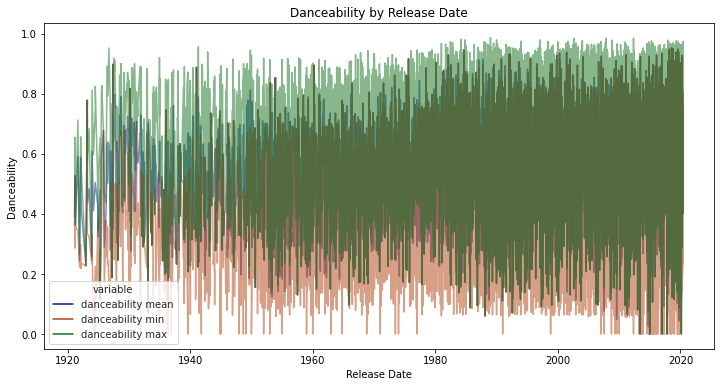

In [88]:
sample2 = grouped_sample[['release_date', 'danceability mean', 'danceability min', 'danceability max']]

f, ax = plt.subplots(figsize=(12, 6))

with sns.axes_style("whitegrid"):
    g = sns.lineplot(
        ax=ax,
        data=pd.melt(sample2, ['release_date']), 
        x="release_date", 
        y="value", 
        hue='variable',
        palette="dark", alpha = .5
    )
    g.set_title("Danceability by Release Date")
    g.set_xlabel("Release Date")
    g.set_ylabel("Danceability")
    g

### Bokeh

In [95]:
output_notebook()

p = figure(title="Danceability by Release Date", 
           y_axis_label='Danceability', 
           x_axis_label='Release Date', 
           width=700, 
           x_axis_type='datetime',
           height = 400)

p.line(x=grouped_sample['release_date'], 
    y=grouped_sample['danceability mean'], color = 'blue', alpha = .5)

p.line(x=grouped_sample['release_date'], 
    y=grouped_sample['danceability min'], color = 'red', alpha = .5)

p.line(x=grouped_sample['release_date'], 
    y=grouped_sample['danceability max'], color = 'green',alpha = .5)

show(p)

Loading BokehJS ...

### Altair

Again we need to melt the data to get the desired effect, but this means the limitations of Altair are much more problematic, as we have even less data than usual.

In [106]:
sample2 = grouped_sample[['release_date', 'danceability mean', 'danceability min', 'danceability max']]
sample2=pd.melt(sample2, ['release_date'])
source = sample2.sample(axis = 0, n=4000)

viz = alt.Chart(source)
viz = viz.mark_line()
viz = viz.encode(
    x='release_date:T',
    y='value:Q',
    color='variable:O'
)
viz = viz.properties(title='Danceability by Release Date').properties(width=600, height=300)

viz

alt.Chart(...)

### Plotnine

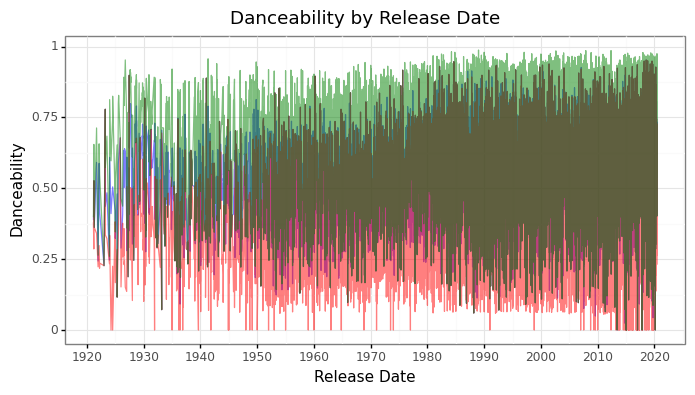

<ggplot: (339357576)>

In [120]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

pno.dpi = (100)
pno.figure_size = (8,4)
ggplot(data=grouped_sample) + \
    theme_bw() + \
    geom_line(aes(x='release_date', y='danceability mean'), color = 'blue', alpha = .5) + \
    geom_line(aes(x='release_date', y='danceability min'), color = 'red', alpha = .5) + \
    geom_line(aes(x='release_date', y='danceability max'), color = 'green', alpha = .5) + \
    scale_x_datetime(breaks=date_breaks('10 years'), labels=date_format('%Y')) +\
    labs(title = "Danceability by Release Date", x="Release Date", y="Danceability")

### Plotly

We can use melted data and stick to Plotly Express, or go with the more extensive option and add traces. Plotly Express cannot do opacity for lines.

In [125]:
fig = px.line(sample2, x="release_date", y='value', color = 'variable',\
 title="Danceability by Release Date",template='plotly_white')
fig.update_layout(
    width=700,height=400,
    margin=dict(l=15,r=25,b=15,t=40,pad=1))
fig.show()


In [131]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=grouped_sample['release_date'], y=grouped_sample['danceability mean'],
                    mode='lines', opacity=.5,
                    name='danceability mean'))
fig.add_trace(go.Scatter(x=grouped_sample['release_date'], y=grouped_sample['danceability min'],
                    mode='lines',opacity=.5,
                    name='danceability min'))
fig.add_trace(go.Scatter(x=grouped_sample['release_date'], y=grouped_sample['danceability max'],
                    mode='lines', opacity=.5,name='danceability max'))
fig.update_layout(
    title = "Danceability by Release Date",
    width=700,height=400,
    margin=dict(l=15,r=25,b=15,t=40,pad=1))
fig.show()

## Time Series Results

Unscientific rankings by me, 1 = best, 6 = worst. Ease of use now includes consistency in the grammar.


|            |features     |beauty    |ease of use   |
|------------|-------------|----------|--------|
|matplotlib  |    6        |    3     |   6   |
|seaborn     |    4        |    5     |   4   |
|bokeh       |    1        |    1     |   1   |
|altair      |    3        |    2     |   3   |
|plotnine    |    2        |    4     |   2   |
|plotly      |    5        |    6     |   5   |

